In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isnull().sum()>0

CustomerID                  False
ProdTaken                   False
Age                          True
TypeofContact                True
CityTier                    False
DurationOfPitch              True
Occupation                  False
Gender                      False
NumberOfPersonVisiting      False
NumberOfFollowups            True
ProductPitched              False
PreferredPropertyStar        True
MaritalStatus               False
NumberOfTrips                True
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
NumberOfChildrenVisiting     True
Designation                 False
MonthlyIncome                True
dtype: bool

In [6]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [7]:
[print(df[[feature]].value_counts() ,'\n') for feature in df.columns if df[feature].dtypes=='O']

TypeofContact  
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64 

Occupation    
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64 

Gender 
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64 

ProductPitched
Basic             1842
Deluxe            1732
Standard           742
Super Deluxe       342
King               230
Name: count, dtype: int64 

MaritalStatus
Married          2340
Divorced          950
Single            916
Unmarried         682
Name: count, dtype: int64 

Designation   
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64 



[None, None, None, None, None, None]

In [8]:
df[['Gender']].value_counts()

Gender 
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
# for feature in categorical_features:
#     print(feature, df[[feature]].value_counts())

In [10]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
df['maritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [12]:
df[['maritalStatus']].value_counts()

maritalStatus
Married          2340
Unmarried        1598
Divorced          950
Name: count, dtype: int64

In [13]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [14]:
for feature in features_with_na:
    print(feature ,'has' , np.round(df[feature].isna().mean()*100,2),'%','null values')

Age has 4.62 % null values
TypeofContact has 0.51 % null values
DurationOfPitch has 5.14 % null values
NumberOfFollowups has 0.92 % null values
PreferredPropertyStar has 0.53 % null values
NumberOfTrips has 2.86 % null values
NumberOfChildrenVisiting has 1.35 % null values
MonthlyIncome has 4.77 % null values


In [15]:
df['Age'].isna().mean()*100

4.623567921440261

In [16]:
df['Age'].shape

(4888,)

In [17]:
df['Age'].isna().sum()

226

In [18]:
df['Age'].isnull().sum()

226

In [19]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


<Axes: ylabel='Age'>

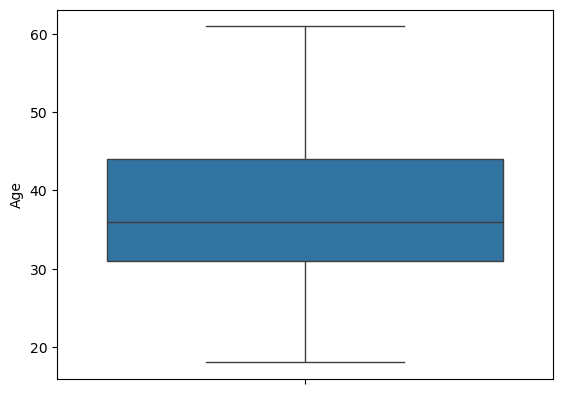

In [20]:
sns.boxplot(df['Age'])

In [21]:
df['Age'].median()
df['Age'].mean()


37.62226512226512

In [22]:
df['Age']=np.where(df['Age'].isnull(),df['Age'].median(),df['Age'])

In [23]:
df['Age'].isnull().sum()

0

In [24]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,maritalStatus
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Unmarried
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Divorced
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Unmarried
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Divorced
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Divorced


In [25]:
df['TypeofContact']=df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

In [26]:
df['DurationOfPitch']=df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

In [27]:
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])

In [28]:
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])

In [29]:
df['NumberOfTrips']=df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())

In [30]:
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])

In [31]:
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [32]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
maritalStatus               0
dtype: int64

In [33]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [34]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'maritalStatus'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [36]:
df[['maritalStatus']]

,maritalStatus
0,Unmarried
1,Divorced
2,Unmarried
3,Divorced
4,Divorced
...,...
4883,Unmarried
4884,Unmarried
4885,Married
4886,Unmarried


In [37]:
df['TotalNumberOfPersonVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']

In [38]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,maritalStatus,TotalNumberOfPersonVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Unmarried,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Divorced,5.0


In [39]:
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)

In [40]:
categorical_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [41]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

In [42]:
numerical_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalNumberOfPersonVisiting']

In [43]:
len(df['ProdTaken'].unique())

2

In [44]:
descreate_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
descreate_features

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'TotalNumberOfPersonVisiting']

In [45]:
continuous_features= [feature for feature in numerical_features if feature not in descreate_features]
continuous_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

In [46]:
# features engineering part2

df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,maritalStatus,TotalNumberOfPersonVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,Unmarried,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,Divorced,5.0


In [47]:
X=df.iloc[:,1:]
y=df['ProdTaken']

In [48]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [51]:
X_train.shape

(3910, 18)

In [52]:
X_test.shape

(978, 18)

In [53]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,maritalStatus,TotalNumberOfPersonVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,Unmarried,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,Divorced,5.0


In [54]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [55]:
numerical_features.remove('ProdTaken')  # removing depnedent feature

In [56]:
preprocessor=ColumnTransformer(
[
        ('oneHotEncoder',OneHotEncoder(drop='first'), categorical_features),
        ('standardScaler',StandardScaler(), numerical_features)
]
)

In [57]:
print(numerical_features)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalNumberOfPersonVisiting']


In [59]:
X_train=preprocessor.fit_transform(X_train)
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [60]:
import pickle

with open('preprocessorUsingColumnTranformer.pkl','wb') as f:
    pickle.dump(preprocessor,f)



In [61]:
preprocessor

ColumnTransformer(transformers=[('oneHotEncoder', OneHotEncoder(drop='first'),
                                 ['TypeofContact', 'Occupation', 'Gender',
                                  'ProductPitched', 'MaritalStatus',
                                  'Designation']),
                                ('standardScaler', StandardScaler(),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfFollowups', 'PreferredPropertyStar',
                                  'NumberOfTrips', 'Passport',
                                  'PitchSatisfactionScore', 'OwnCar',
                                  'MonthlyIncome',
                                  'TotalNumberOfPersonVisiting'])])

In [62]:
with open('preprocessorUsingColumnTranformer.pkl','rb') as f:
    columnTransformation=pickle.load(f)

In [63]:
X_test=columnTransformation.transform(X_test)
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [217]:
models={
       'Decision_tress':DecisionTreeClassifier(),
    'randomForest':RandomForestClassifier()
}


In [219]:
for model in models.values():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       787
           1       0.77      0.75      0.76       191

    accuracy                           0.91       978
   macro avg       0.86      0.85      0.85       978
weighted avg       0.91      0.91      0.91       978

[[745  42]
 [ 47 144]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       787
           1       0.95      0.62      0.75       191

    accuracy                           0.92       978
   macro avg       0.93      0.81      0.85       978
weighted avg       0.92      0.92      0.91       978

[[781   6]
 [ 72 119]]


In [201]:
list(models.values())

[RandomForestClassifier()]

In [206]:
roc_auc_score(y_test,y_pred)

0.812941982610084

In [208]:
roc_curve(y_test,y_pred)

(array([0.        , 0.00762389, 1.        ]),
 array([0.        , 0.63350785, 1.        ]),
 array([inf,  1.,  0.]))